In [1]:
import numpy as np
import cv2
import time

def objective_function(params, image):
    decoded_image = params.reshape(image.shape)
    error = np.mean((decoded_image - image)**2)
    return error

def BES(nPop, MaxIt, low, high, dim, fobj, image):
    st = time.time()

    # Initialize Best Solution
    BestSol = {'pos': np.zeros(dim), 'cost': float('inf')}
    pop = {'pos': np.zeros((nPop, dim)), 'cost': np.zeros(nPop)}

    for i in range(nPop):
        pop['pos'][i] = low + (high - low) * np.random.rand(dim)
        pop['cost'][i] = fobj(pop['pos'][i], image)
        if pop['cost'][i] < BestSol['cost']:
            BestSol['pos'] = pop['pos'][i].copy()
            BestSol['cost'] = pop['cost'][i]

    print([0, BestSol['cost']])

    Convergence_curve = np.zeros(MaxIt)

    for t in range(MaxIt):
        # 1- select_space
        pop, BestSol, s1 = select_space(fobj, pop, nPop, BestSol, low, high, dim, image)
        # 2- search_space
        pop, BestSol, s2 = search_space(fobj, pop, BestSol, nPop, low, high, dim, image)
        # 3- swoop
        pop, BestSol, s3 = swoop(fobj, pop, BestSol, nPop, low, high, dim, image)

        Convergence_curve[t] = BestSol['cost']
        print([t, BestSol['cost']])

    ed = time.time()
    timep = ed - st

    return BestSol, Convergence_curve, timep

def select_space(fobj, pop, npop, BestSol, low, high, dim, image):
    Mean = np.mean(pop['pos'], axis=0)
    lm = 2
    s1 = 0
    for i in range(npop):
        newsol_pos = BestSol['pos'] + lm * np.random.rand(dim) * (Mean - pop['pos'][i])
        newsol_pos = np.maximum(newsol_pos, low)
        newsol_pos = np.minimum(newsol_pos, high)
        newsol_cost = fobj(newsol_pos, image)
        if newsol_cost < pop['cost'][i]:
            pop['pos'][i] = newsol_pos.copy()
            pop['cost'][i] = newsol_cost
            s1 += 1
            if pop['cost'][i] < BestSol['cost']:
                BestSol['pos'] = pop['pos'][i].copy()
                BestSol['cost'] = pop['cost'][i]
    return pop, BestSol, s1

def search_space(fobj, pop, best, npop, low, high, dim, image):
    Mean = np.mean(pop['pos'], axis=0)
    a = 10
    R = 1.5
    s1 = 0
    for i in range(npop - 1):
        A = np.random.permutation(npop)
        pop['pos'] = pop['pos'][A]
        pop['cost'] = pop['cost'][A]
        x, y = polr(a, R, npop)
        newsol_pos = pop['pos'][i] + y[i] * (pop['pos'][i] - pop['pos'][i+1]) + x[i] * (pop['pos'][i] - Mean)
        newsol_pos = np.maximum(newsol_pos, low)
        newsol_pos = np.minimum(newsol_pos, high)
        newsol_cost = fobj(newsol_pos, image)
        if newsol_cost < pop['cost'][i]:
            pop['pos'][i] = newsol_pos.copy()
            pop['cost'][i] = newsol_cost
            s1 += 1
            if pop['cost'][i] < best['cost']:
                best['pos'] = pop['pos'][i].copy()
                best['cost'] = pop['cost'][i]
    return pop, best, s1

def swoop(fobj, pop, best, npop, low, high, dim, image):
    Mean = np.mean(pop['pos'], axis=0)
    a = 10
    R = 1.5
    s1 = 0
    for i in range(npop):
        A = np.random.permutation(npop)
        pop['pos'] = pop['pos'][A]
        pop['cost'] = pop['cost'][A]
        x, y = swoo_p(a, R, npop)
        newsol_pos = np.random.rand(dim) * best['pos'] + x[i] * (pop['pos'][i] - 2 * Mean) + y[i] * (pop['pos'][i] - 2 * best['pos'])
        newsol_pos = np.maximum(newsol_pos, low)
        newsol_pos = np.minimum(newsol_pos, high)
        newsol_cost = fobj(newsol_pos, image)
        if newsol_cost < pop['cost'][i]:
            pop['pos'][i] = newsol_pos.copy()
            pop['cost'][i] = newsol_cost
            s1 += 1
            if pop['cost'][i] < best['cost']:
                best['pos'] = pop['pos'][i].copy()
                best['cost'] = pop['cost'][i]
    return pop, best, s1

def polr(a, R, N):
    th = a * np.pi * np.random.rand(N)
    r = th + R * np.random.rand(N)
    xR = r * np.sin(th)
    yR = r * np.cos(th)
    xR = xR / np.max(np.abs(xR))
    yR = yR / np.max(np.abs(yR))
    return xR, yR

def swoo_p(a, R, N):
    th = a * np.pi * np.exp(np.random.rand(N))
    r = th  # R * np.random.rand(N)
    xR = r * np.sinh(th)
    yR = r * np.cosh(th)
    xR = xR / np.max(np.abs(xR))
    yR = yR / np.max(np.abs(yR))
    return xR, yR

# Example usage:
nPop = 50
MaxIt = 5
low = -10
high = 10

# Read the image using OpenCV
image = cv2.imread("cover (1).png")

if image is None:
    print("Error: Unable to load image.")
    exit()

dim = image.flatten().shape[0]
best_solution, convergence_curve, execution_time = BES(nPop, MaxIt, low, high, dim, objective_function, image)
print("Best solution:", best_solution)
print("Convergence curve:", convergence_curve)
print("Execution time:", execution_time, "seconds")


[0, 12862.101405301395]
[0, 12831.394995249437]
[1, 12831.313031190935]
[2, 12831.287503072928]
[3, 12831.24420585977]
[4, 12831.225308368048]
Best solution: {'pos': array([ 0.00704518, -0.86214412,  0.04241394, ...,  0.15986683,
        0.08914987,  0.10074948]), 'cost': 12831.225308368048}
Convergence curve: [12831.39499525 12831.31303119 12831.28750307 12831.24420586
 12831.22530837]
Execution time: 149.1402063369751 seconds


In [2]:
pos=50

In [3]:
BestSol = {'pos': np.zeros(dim), 'cost': float('inf')}
   # pop = {'pos': np.zeros((nPop, dim)), 'cost': np.zeros(nPop)}

In [4]:
print("Best solution position:", best_solution['pos'])
print("Best solution cost:", best_solution['cost'])

Best solution position: [ 0.00704518 -0.86214412  0.04241394 ...  0.15986683  0.08914987
  0.10074948]
Best solution cost: 12831.225308368048


In [18]:
for i in best_solution['pos']:
    print(i)

0.51029347163041
-1.3166033406756876
-0.35005596918137183
-0.7506093341061194
-1.8488621746941294
2.9613329798083505
-0.8267961149917166
0.3621685256347683
-0.9099164845531588
-0.886045412034411
-3.537823518235146
-0.5179122723336883
0.8998955138246767
-1.8131804832309628
4.297772503377762
3.242656937971299
2.1251861637399982
0.5601770445051101
1.6325524891084466
-0.9200677127110429
-0.5615211619355429
0.32462734095414203
2.72070793005229
-0.2892976827914888
0.2915958479472138
0.059602773099391
-0.7356010634023579
-0.470812059184541
2.3534645538698102
-1.508755785323974
-1.7921525974206947
-2.4965848543328653
-1.2614489086121417
0.4014538122309076
-1.8864156128400293
2.8965254637937106
0.9625122739244749
-1.781164520397527
0.6873215481009461
-1.6842046882396042
0.1537293114820112
3.912556197571932
0.3679089432570104
1.0350335863014934
4.107836022584948
2.7776405953579073
0.5442715811658692
-0.3831797508558682
4.184809034705976
-0.04636527110602893
-0.3508814602044183
-0.203018622459433

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
with open("best_solution.txt", "w") as file:
    # Write the position of the best solution
    file.write("Best solution position:\n")
    for value in best_solution['pos']:
        file.write(str(value) + "\n")

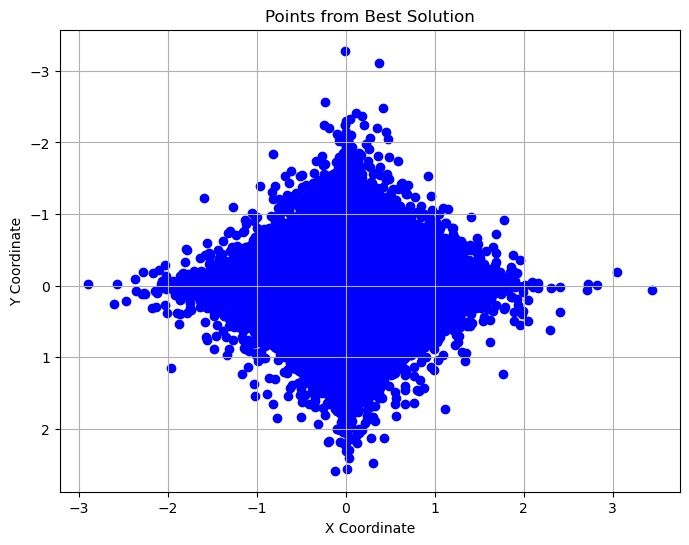

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape the scalar values into pairs of coordinates
num_points = 4  # We expect four points for a square pattern
coordinates = np.reshape(best_solution['pos'], (-1, 2))

# Plot the points on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', marker='o')
plt.title('Points from Best Solution')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.show()



Point 1: (-4.646582113126128, -0.15300938384981885)
Point 2: (-0.057811872120043156, -4.026794752766294)
Point 3: (3.9947898133772695, 0.009905765112701779)
Point 4: (0.11361862652270249, 4.133076428659039)


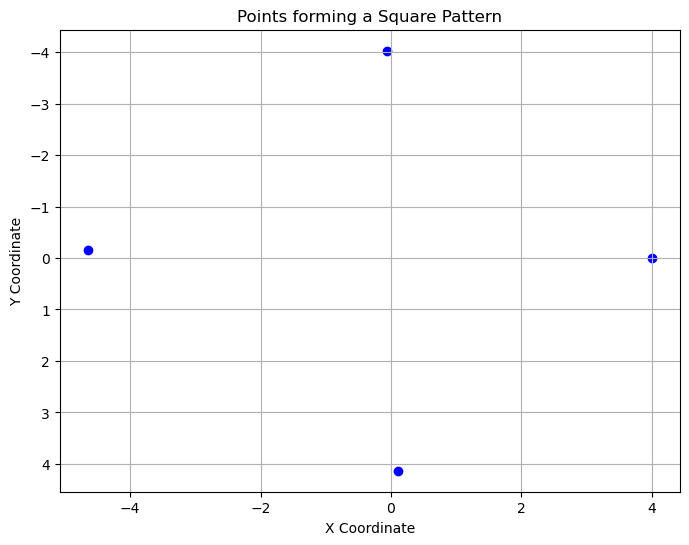

In [7]:
# Find the indices of the points with maximum and minimum x-coordinates
min_x_idx = np.argmin(coordinates[:, 0])
max_x_idx = np.argmax(coordinates[:, 0])

# Find the indices of the points with maximum and minimum y-coordinates
min_y_idx = np.argmin(coordinates[:, 1])
max_y_idx = np.argmax(coordinates[:, 1])

# Select the four points forming the square pattern
square_points = coordinates[[min_x_idx, min_y_idx, max_x_idx, max_y_idx]]

# Extract x and y coordinates of the square points
x1, y1 = square_points[0]
x2, y2 = square_points[1]
x3, y3 = square_points[2]
x4, y4 = square_points[3]

# Print the coordinates of the four points
print("Point 1: ({}, {})".format(x1, y1))
print("Point 2: ({}, {})".format(x2, y2))
print("Point 3: ({}, {})".format(x3, y3))
print("Point 4: ({}, {})".format(x4, y4))

import matplotlib.pyplot as plt

# Plot the points forming a square pattern
plt.figure(figsize=(8, 6))
plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4], color='blue', marker='o')
plt.title('Points forming a Square Pattern')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis if needed
plt.show()


In [7]:
# Find the indices of the points with maximum and minimum x-coordinates
min_x_idx = np.argmin(coordinates[:, 0])
max_x_idx = np.argmax(coordinates[:, 0])

# Find the indices of the points with maximum and minimum y-coordinates
min_y_idx = np.argmin(coordinates[:, 1])
max_y_idx = np.argmax(coordinates[:, 1])

# Select the four points forming the square pattern
square_points = coordinates[[min_x_idx, min_y_idx, max_x_idx, max_y_idx]]

# Extract x and y coordinates of the square points
x1, y1 = square_points[0]
x2, y2 = square_points[1]
x3, y3 = square_points[2]
x4, y4 = square_points[3]

# Print the coordinates of the four points
print("Point 1: ({}, {})".format(x1, y1))
print("Point 2: ({}, {})".format(x2, y2))
print("Point 3: ({}, {})".format(x3, y3))
print("Point 4: ({}, {})".format(x4, y4))


Point 1: (-2.897464782612882, -0.018326997296627418)
Point 2: (-0.012966761391973008, -3.2810884548859396)
Point 3: (3.4379179856350635, 0.06559123076346182)
Point 4: (-0.12426612682693408, 2.5880101239972344)


In [8]:
with open("points.txt", "w") as file:
    file.write("({}, {})\n".format(x1, y1))
    file.write("({}, {})\n".format(x2, y2))
    file.write("({}, {})\n".format(x3, y3))
    file.write("({}, {})\n".format(x4, y4))

#print("Points have been written to 'points.txt' file.")

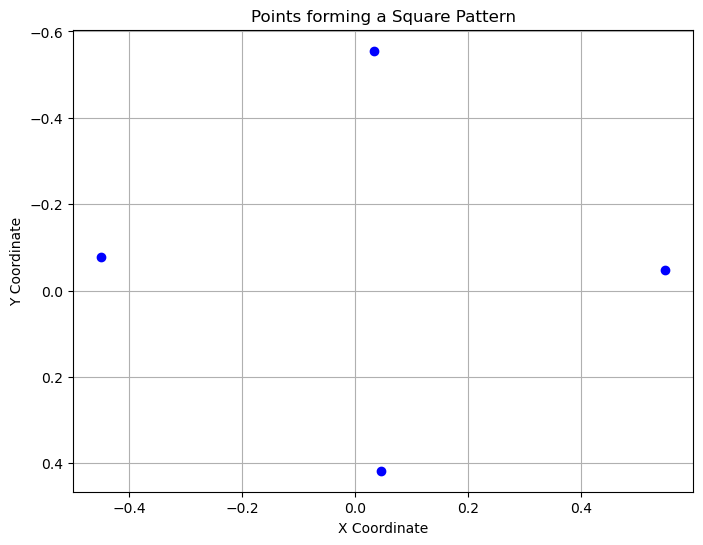

In [9]:
import matplotlib.pyplot as plt

# Coordinates of the four points
points = [(-0.4498935096005164, -0.07874458579661309),
          (0.03316101703141606, -0.5552385776887522),
          (0.5474909184526108, -0.04833165382392311),
          (0.0447369096600636, 0.4172319089220921)]

# Extract x and y coordinates of the points
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# Plot the points on a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color='blue', marker='o')
plt.title('Points forming a Square Pattern')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis if needed
plt.show()